In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from array import *
%matplotlib inline

In [2]:
#Load sheets in
Molarity = np.array(pd.read_csv("spectral_database_battery_elytes_molarity.csv"))
Time = pd.read_csv('spectral_data_battery_test_time.csv',header = None).T
Absorb = np.array(pd.read_csv("spectral_data_battery_test_absorbance.csv"))
CV = np.array(pd.read_csv("CV_data.csv"))

(950.0, 1100.0)

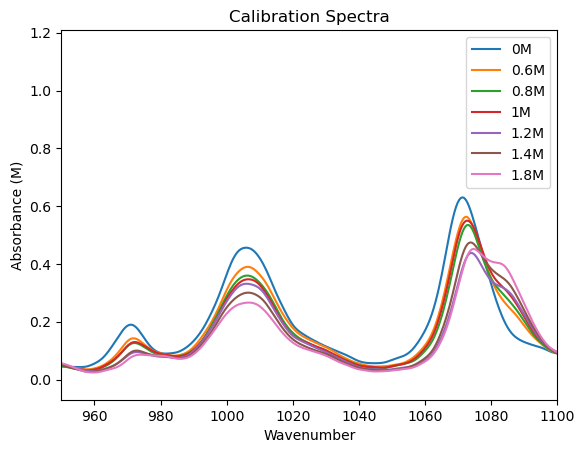

In [3]:
plt.plot(Molarity[:,0],Molarity[:,1],label="0M")
plt.plot(Molarity[:,0],Molarity[:,2],label="0.6M")
plt.plot(Molarity[:,0],Molarity[:,3],label="0.8M")
plt.plot(Molarity[:,0],Molarity[:,4],label="1M")
plt.plot(Molarity[:,0],Molarity[:,5],label="1.2M")
plt.plot(Molarity[:,0],Molarity[:,6],label="1.4M")
plt.plot(Molarity[:,0],Molarity[:,7],label="1.8M")
plt.legend()
plt.xlabel("Wavenumber")
plt.ylabel("Absorbance (M)")
plt.title("Calibration Spectra")
plt.xlim(950,1100)

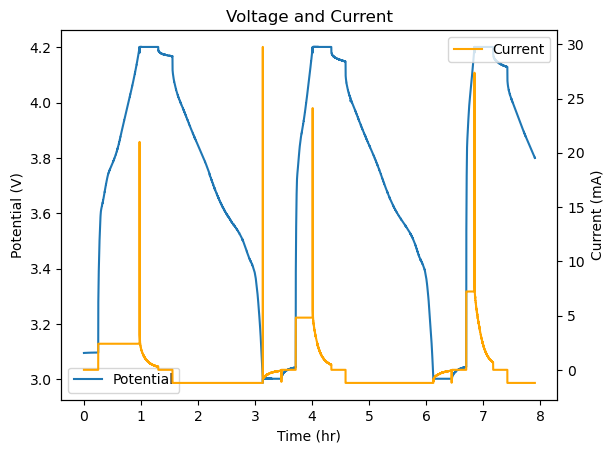

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(CV[:,0]/3600,CV[:,1]) #Voltage plot
ax2.plot(CV[:,0]/3600,CV[:,2]*1000, color = 'orange') #Current plot
ax1.set_xlabel("Time (hr)")
ax1.set_ylabel("Potential (V)")
ax2.set_ylabel("Current (mA)")
ax1.set_title("Voltage and Current")
ax1.legend(["Potential"])
ax2.legend(["Current"])
#plt.xlim(6.65,7)

(950.0, 1100.0)

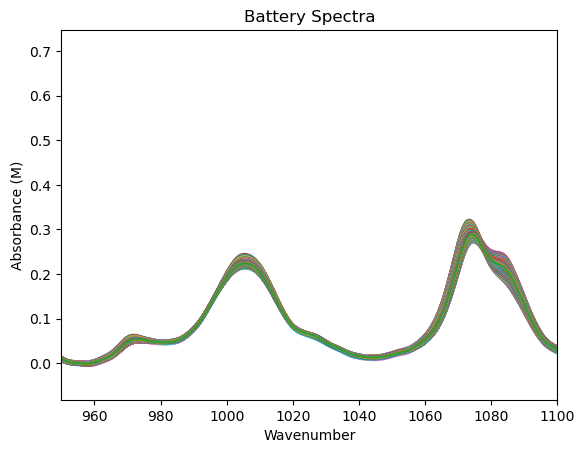

In [21]:
#for i in range(1963):
    #plt.plot(Absorb[:,0],Absorb[:,i+1])
plt.plot(Absorb[:,0],Absorb[:,slice(1,1964)])
plt.xlabel("Wavenumber")
plt.ylabel("Absorbance (M)")
plt.title("Battery Spectra")
plt.xlim(950,1100)

Analyze Current and Voltage Data:

In [6]:
print("Charge rate 1 is 2.402 mA")
print("Charge rate 2 is 4.808 mA")
print("Charge rate 3 is 7.215 mA")
print("Discharge rates are all -1.21 mA")

C1 = 2.402*(3513-900.708)/3600
C2 = 4.808*(14444.61-13373.35)/3600
C3 = 7.215*(24662.6-24144.38)/3600

print("Capacity of charge period one:", C1, "mAh")
print("Capacity of charge period two:", C2, "mAh")
print("Capacity of charge period three:", C3, "mAh")

Charge rate 1 is 2.402 mA
Charge rate 2 is 4.808 mA
Charge rate 3 is 7.215 mA
Discharge rates are all -1.21 mA
Capacity of charge period one: 1.7429792733333334 mAh
Capacity of charge period two: 1.4307272444444448 mAh
Capacity of charge period three: 1.038599249999995 mAh


Spectral Feature for Diagnostic:
Integration of peaks at wavenumber 1000 (980 to 1040)

[-2.62237334 12.90356262]


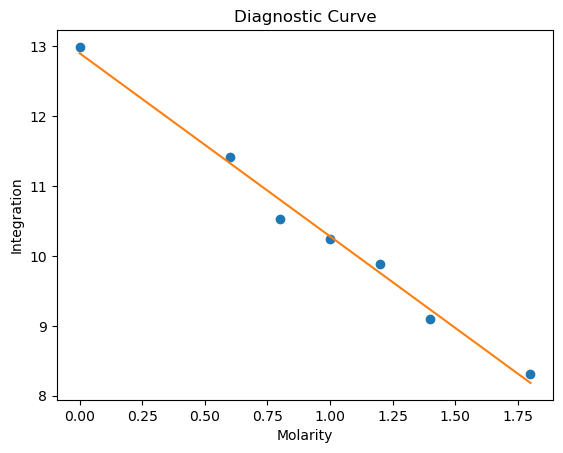

In [14]:
Cor0 = np.trapz(Molarity[slice(687,812),1],Molarity[slice(687,812),0])
Cor1 = np.trapz(Molarity[slice(687,812),2],Molarity[slice(687,812),0])
Cor2 = np.trapz(Molarity[slice(687,812),3],Molarity[slice(687,812),0])
Cor3 = np.trapz(Molarity[slice(687,812),4],Molarity[slice(687,812),0])
Cor4 = np.trapz(Molarity[slice(687,812),5],Molarity[slice(687,812),0])
Cor5 = np.trapz(Molarity[slice(687,812),6],Molarity[slice(687,812),0])
Cor6 = np.trapz(Molarity[slice(687,812),7],Molarity[slice(687,812),0])

corx = np.array([0,.6,.8,1,1.2,1.4,1.8])
cory = np.array([Cor0,Cor1,Cor2,Cor3,Cor4,Cor5,Cor6])
corfit = np.polyfit(corx,cory,1)
xx = np.linspace(0,1.8,1000)
yy = np.polyval(corfit,xx)
plt.plot(corx,cory,'o')
plt.plot(xx,yy)
plt.xlabel("Molarity")
plt.ylabel("Integration")
plt.title("Diagnostic Curve")
print(corfit)

def Diagnostic(y):
    M = (y-corfit[1])/corfit[0]
    return M

[6.31831372 6.37206834 6.34780197 ... 6.3135344  6.33637125 6.33534879]


Text(0.5, 0, 'Time (hr)')

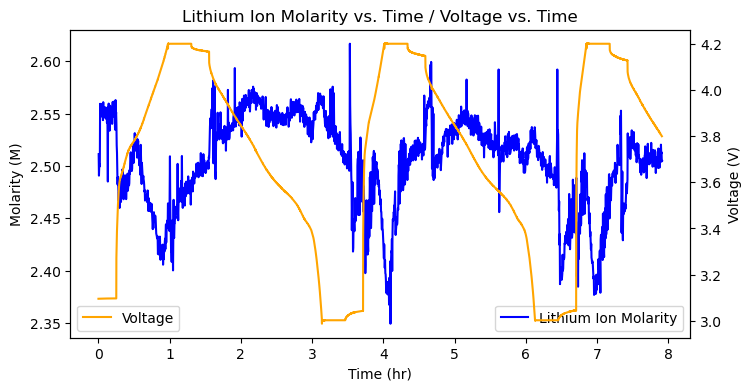

In [8]:
integ = np.zeros(1963)
batmoly = np.zeros(1963)
for i in range(1963):
    integ[i] = np.trapz(Absorb[slice(687,812),i+1],Absorb[slice(687,812),0])
    batmoly[i] = Diagnostic(integ[i])
print(integ)
fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()
#ax3 = ax1.twinx()
batmoly1 = pd.DataFrame(batmoly)
ax1.plot(Time/3600,batmoly1, color = 'blue',label="Lithium Ion Molarity")
ax2.plot(CV[:,0]/3600,CV[:,1], color="orange",label="Voltage") #Voltage plot
#ax3.plot(CV[:,0]/3600,CV[:,2]*1000, color = 'green',label="Current") #Current plot
#ax1.set_ylim(2.3,2.65)
plt.title("Lithium Ion Molarity vs. Time / Voltage vs. Time")
ax2.legend(loc=3)
ax1.legend(loc=4)
#ax3.legend(loc=1)
plt.xlabel("Time (hrs)")
ax1.set_ylabel("Molarity (M)")
ax2.set_ylabel("Voltage (V)")
ax1.set_xlabel("Time (hr)")

Text(0.5, 0, 'Time (hr)')

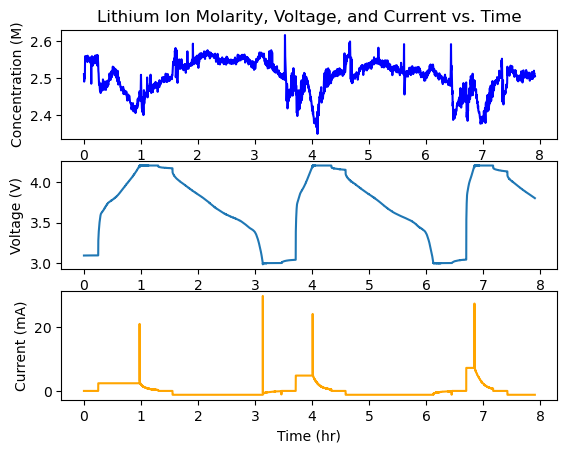

In [9]:
plt.subplot(3,1,1)
plt.plot(Time/3600,batmoly1, color = 'blue',label="Lithium Ion Molarity")
plt.title("Lithium Ion Molarity, Voltage, and Current vs. Time")
plt.ylabel("Concentration (M)")
plt.subplot(3,1,2)
plt.plot(CV[:,0]/3600,CV[:,1]) #Voltage plot
plt.ylabel("Voltage (V)")
plt.subplot(3,1,3)
plt.plot(CV[:,0]/3600,CV[:,2]*1000, color = 'orange') #Current plot
plt.ylabel("Current (mA)")
plt.xlabel("Time (hr)")

In [10]:
from sklearn.metrics import r2_score

In [16]:
#R2 Score of Fit
f = np.polyval(corfit,corx)
r2 = r2_score(cory,f)
print("R2 of the Diagnostic curve fit is",r2)

#Uncertainty:
Av = np.average(cory)
Sum = (Av-Cor0)**2+(Av-Cor1)**2+(Av-Cor2)**2+(Av-Cor3)**2+(Av-Cor4)**2+(Av-Cor5)**2+(Av-Cor6)**2
Uncertainty = np.sqrt(Sum/42)
print("Uncertainty is:",Uncertainty)

R2 of the Diagnostic curve fit is 0.9898202457025796
Uncertainty is: 0.5800930802866148
